# LinkedList




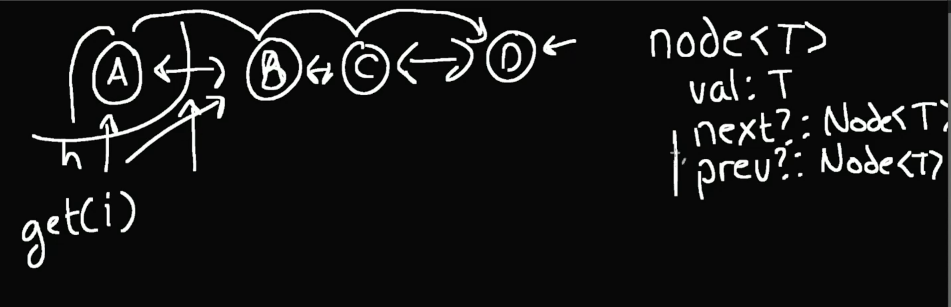

insertion, deletion is a constant operation. O(1).


If we want to get a value, we have to walk to the value.
e.g to get the 5th position value, we have to loop and find the value O(N)

getting head/tail is a constant operation.

deletion at the front of head or tail is a constant operation.

deletion at the middle can be costly.


# Important Concept

LinkedList is so foundatinal to programming concepts when it comes to DSA. Understanding them will help you with trees, graphs, etc.

## Visualization of LinkedList

[VisualGo - LinkedList](https://visualgo.net/en/list?slide=1)


# Implementation of a DoublyLinkedList

In [21]:
class Node<T> {
    value: T;
    next: Node<T> | null = null;
    prev: Node<T> | null = null;

    constructor(value: T) {
        this.value = value;
    }
}

export default class DoublyLinkedList<T> {
    private head: Node<T> | null = null;
    private tail: Node<T> | null = null;
    public length: number = 0;

    constructor() {}

    prepend(item: T): void {
        const newNode = new Node(item);
        if (!this.head) {
            this.head = this.tail = newNode;
        } else {
            newNode.next = this.head;
            this.head.prev = newNode;
            this.head = newNode;
        }
        this.length++; 
    }

    insertAt(item: T, idx: number): void {
        if (idx < 0 || idx > this.length) throw new Error("Invalid index");
        if (idx === 0) return this.prepend(item);
        if (idx === this.length) return this.append(item);

        const newNode = new Node(item);

        // Before:
        // 
        // current -> current.next
        // 
        // After: 
        // 
        // current -> new_node -> current.next
        //          ^            ^
        //          |            | 
        //         prev          prev
        let current = this.head;
        for (let i = 0; i < idx - 1; i++) {
            if (!current) throw new Error("Invalid state");
            current = current.next;
        }
        newNode.next = current!.next;
        newNode.prev = current;
        current!.next!.prev = newNode;
        current!.next = newNode;

        this.length++;
    }

    append(item: T): void {
        const newNode = new Node(item);
        if (!this.tail) {
            this.head = this.tail = newNode;
        } else {
            this.tail.next = newNode;
            newNode.prev = this.tail;
            this.tail = newNode;
        }
        this.length++;
    }

    remove(item: T): T | undefined {
        let current = this.head;
        while (current) {
            if (current.value === item) {
                if (current.prev) current.prev.next = current.next;
                else this.head = current.next;

                if (current.next) current.next.prev = current.prev;
                else this.tail = current.prev;

                this.length--;
                return current.value;
            }
            current = current.next;
        }
        return undefined;
    }

    get(idx: number): T | undefined {
        if (idx < 0 || idx >= this.length) return undefined;
        let current = this.head;
        for (let i = 0; i < idx; i++) {
            if (!current) return undefined;
            current = current.next;
        }
        return current!.value;
    }

    removeAt(idx: number): T | undefined {
        if (idx < 0 || idx >= this.length) return undefined;
        let current = this.head;
        for (let i = 0; i < idx; i++) {
            if (!current) return undefined;
            current = current.next;
        }

        if (current!.prev) current!.prev.next = current!.next;
        else this.head = current!.next;

        if (current!.next) current!.next.prev = current!.prev;
        else this.tail = current!.prev;

        this.length--;
        return current!.value;
    }
}


## prepend()

This method adds an item to the beginning of the list.


In [2]:
const list = new DoublyLinkedList<number>();
list.prepend(10);
list.prepend(5);
// The list now is: 5 -> 10

console.log(list);


DoublyLinkedList {
  head: <ref *1> Node {
    value: 5,
    next: Node { value: 10, next: null, prev: [Circular *1] },
    prev: null
  },
  tail: <ref *2> Node {
    value: 10,
    next: null,
    prev: <ref *1> Node {
      value: 5,
      next: [Circular *2],
      prev: null
    }
  },
  length: 2
}


## insertAt()

This will insert an item at a specific index of the list,


In [3]:
list.insertAt(7, 1);
// The list now is: 5 -> 7 -> 10

console.log(list);

DoublyLinkedList {
  head: <ref *2> Node {
    value: 5,
    next: <ref *1> Node {
      value: 7,
      next: Node { value: 10, next: null, prev: [Circular *1] },
      prev: [Circular *2]
    },
    prev: null
  },
  tail: <ref *3> Node {
    value: 10,
    next: null,
    prev: <ref *1> Node {
      value: 7,
      next: [Circular *3],
      prev: <ref *2> Node {
        value: 5,
        next: [Circular *1],
        prev: null
      }
    }
  },
  length: 3
}


## append()

append at the tail of the list

In [4]:
list.append(15);
// The list now is: 5 -> 7 -> 10 -> 15

console.log(list);

DoublyLinkedList {
  head: <ref *3> Node {
    value: 5,
    next: <ref *2> Node {
      value: 7,
      next: <ref *1> Node {
        value: 10,
        next: Node { value: 15, next: null, prev: [Circular *1] },
        prev: [Circular *2]
      },
      prev: [Circular *3]
    },
    prev: null
  },
  tail: <ref *4> Node {
    value: 15,
    next: null,
    prev: <ref *1> Node {
      value: 10,
      next: [Circular *4],
      prev: <ref *2> Node {
        value: 7,
        next: [Circular *1],
        prev: <ref *3> Node {
          value: 5,
          next: [Circular *2],
          prev: null
        }
      }
    }
  },
  length: 4
}


## remove()

This method removes the first occurrence of a given item from the list.


In [15]:
list.remove(7);
// The list now is: 5 -> 10 -> 15
console.log(list);

DoublyLinkedList {
  head: <ref *2> Node {
    value: 5,
    next: <ref *1> Node {
      value: 10,
      next: Node { value: 15, next: null, prev: [Circular *1] },
      prev: [Circular *2]
    },
    prev: null
  },
  tail: <ref *3> Node {
    value: 15,
    next: null,
    prev: <ref *1> Node {
      value: 10,
      next: [Circular *3],
      prev: <ref *2> Node {
        value: 5,
        next: [Circular *1],
        prev: null
      }
    }
  },
  length: 3
}


## get()

This method retrieves the item at a specific index in the list.


In [16]:
const item = list.get(1);
console.log(item); // Outputs: 10


10


## removeAt()

This method removes the item at a specific index in the list.


In [17]:
list.removeAt(2);
// The list now is: 5 -> 10

console.log(list);

DoublyLinkedList {
  head: <ref *1> Node {
    value: 5,
    next: Node { value: 10, next: null, prev: [Circular *1] },
    prev: null
  },
  tail: <ref *2> Node {
    value: 10,
    next: null,
    prev: <ref *1> Node {
      value: 5,
      next: [Circular *2],
      prev: null
    }
  },
  length: 2
}


# Implementation of a LinkedList

In [14]:
export default class SinglyLinkedList<T> {
    head: Node<T> | null = null;

    public length = 0; 

    constructor() {}

    // set item at the head
    prepend(item: T): void {
        const newNode = new Node(item);
        newNode.next = this.head;
        this.head = newNode;
        this.length++;
    }

    // set item at a specific index
    insertAt(item: T, idx: number): void {
        // check if index is valid
        if(idx > this.length || idx < 0) return;

        // if the provided index is the firt index, just prepend
        if(idx === 0) {
            this.prepend(item);
            return;
        }

        const newNode = new Node(item);
        let current = this.head; 
        
        // 'walk' thru the list to get to the index required. 
        for(let i = 0; i < idx - 1; i++) {
            current = current!.next;
        }
       
        // set the item to the index wanted
        current!.next = newNode;
        newNode.next = current!.next;

        this.length++;
    }

    append(item: T): void {
        const newNode = new Node(item);
        
        if (!this.head){
            this.head = newNode;
        } else {
            let current = this.head;

            while (current!.next)  {
                current = current!.next;
            }
            current!.next = newNode;
        }
                        
        this.length++;
    }

    remove(item: T): T | undefined {
        if (!this.head) return undefined;

        if(this.head.value === item) {
            this.head = this.head.next;
            this.length--;
            return item;
        }

        let current = this.head;
        while(current!.next && current.next.value !== item) {
            current = current!.next;
        }
        if(current!.next){
            const removed = current!.next!.value;
            current!.next = current!.next!.next;
            this.length--;
            return removed;
        }
        return undefined;
    }

    get(idx: number): T | undefined {
        if(idx >= this.length || idx < 0) return undefined;

        let current = this.head;
        for(let i = 0; i < idx; ++i) {
            current = current!.next;
        }
        return current!.value; 
    }
    
    removeAt(idx: number): T | undefined {
        if (idx >= this.length || idx < 0) return undefined;

        if (idx === 0) {
            return this.remove(this.head!.value);
        }

        let current = this.head;
        for(let i = 0; i < idx - 1; i++) {
            current = current!.next;
        }
        const removed = current!.next!.value;
        current!.next = current!.next!.next;
        this.length--;
        return removed; 
    }
}

class Node<T> {
    value: T;
    next: Node<T> | null = null;

    constructor(value: T) {
        this.value = value;
    }
}




In [15]:
const list = new SinglyLinkedList<number>();
list.prepend(10);
list.append(17);
// The list now is: 10 -> 17

console.log(list);


SinglyLinkedList {
  head: Node { value: 10, next: Node { value: 17, next: null } },
  length: 2
}


In [16]:
list.removeAt(0);

10

In [17]:
console.log(list);

SinglyLinkedList { head: Node { value: 17, next: null }, length: 1 }


# Arrays vs LinkedList

- Usabilily
- Time
- Space

## Array

Usability:
- You can't insert a value into an array without writing for loop to shift everything first.
- Or to unshift if you want to delete an element from an array.
- Suitable for random access of a list.

Time:
- O(1) for write, get.

Space:
-  Upfront contiguous memory.

## Linked List

Usability:
- Traverse a list (linear search) before can insert.
- Suitable for push/pop from the head/tail of a list.

Time:
- O(N) for get. 

Space:
- Memory usage is optimized based on the N amount of nodes. 



